In [31]:
import numpy as np
import pandas as pd
from sklearn import preprocessing,neighbors
from sklearn.model_selection import cross_val_score,train_test_split


In [23]:
df = pd.read_csv('breast-cancer.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'],1,inplace = True)

In [24]:
x = np.array(df.drop(['class'],1))
y = np.array(df['class'])

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [35]:
clf = neighbors.KNeighborsClassifier()

In [37]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.9857142857142858


In [51]:
example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

[2]


In [80]:
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
import numpy as np
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import random

In [56]:
dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

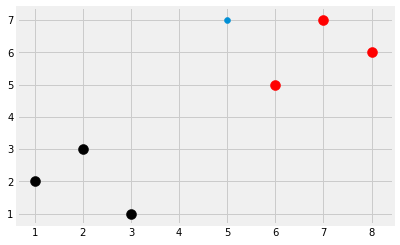

In [57]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1])

In [67]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [68]:
result = k_nearest_neighbors(dataset, new_features)
print(result)

r


In [83]:
df = pd.read_csv('breast-cancer.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9517857142857142
